# Actividad 24: Aprendizaje supervisado - Clasificación por kernels y bioinspirados

En este ejercicio, exploraremos un conjunto de datos que contiene información sobre diferentes características de frutas, como masa, ancho, altura y puntuación de color. Luego, construiremos y evaluaremos varios modelos de clasificación para predecir la etiqueta de la fruta en función de estas características. Utilizaremos Python y las bibliotecas de ciencia de datos, como `Pandas, Matplotlib, Seaborn y Scikit-Learn`.

## Paso 1: Preparación del entorno

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from pandas.plotting import scatter_matrix
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Paso 2: Importar datos

Importar el archivo `fruit_data_with_colors.txt`. Este archivo contiene datos detallados sobre diferentes tipos de frutas. Cada fila del archivo representa una fruta específica y proporciona información relevante sobre sus características. Las columnas presentes en el archivo son las siguientes:

- `fruit_label`: Este atributo numérico representa la etiqueta asignada a cada fruta. Cada etiqueta se refiere a un tipo de fruta en particular. Las etiquetas permiten la clasificación y el análisis de las frutas según sus características.

- `fruit_name`: Esta columna contiene el nombre común de la fruta. Proporciona una identificación legible por humanos de la fruta a la que hace referencia.

- `fruit_subtype`: Aquí se especifica el subtipo o variedad específica de la fruta. Esta columna proporciona información adicional sobre la clasificación detallada de las frutas según ciertos criterios.

- `mass`: Indica la masa de la fruta en alguna unidad de medida. La masa es una característica importante que influye en la identificación y clasificación de la fruta.

- `width`: Representa el ancho de la fruta en una unidad de medida. El ancho es otra dimensión clave que contribuye a las características distintivas de la fruta.

- `height`: Este atributo refleja la altura de la fruta en una unidad de medida. La altura es una característica relevante para diferenciar entre diferentes tipos de frutas.

- `color_score`: Proporciona una puntuación numérica que evalúa el color de la fruta. Esta puntuación puede estar relacionada con la madurez y calidad de la fruta.

Estos datos permiten realizar análisis estadísticos, visualizaciones y modelado de clasificación para comprender mejor las relaciones entre las características de las frutas y sus etiquetas. El archivo CSV es una fuente valiosa para estudios de ciencia de datos y aplicaciones relacionadas con la clasificación y el análisis de frutas.

In [2]:
# Ruta al archivo de datos
ruta_archivo = 'fruits_data_with_colors.csv'

# Cargar el archivo en un DataFrame
fruits = pd.read_table(ruta_archivo)

# Mostrar las primeras filas del DataFrame para verificar la carga
print(fruits.head())

   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79


## Paso 3: Análisis exploratorio de datos

(59, 7)
['apple' 'mandarin' 'orange' 'lemon']
fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


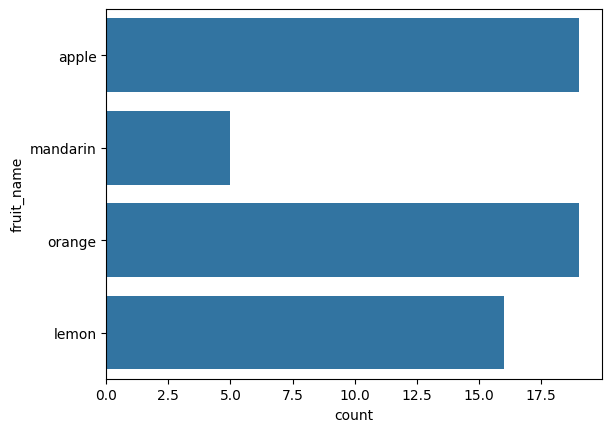

In [3]:
print(fruits.shape)
print(fruits['fruit_name'].unique())
print(fruits.groupby('fruit_name').size())
sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

### Visualización

### Resumen estadístico de los datos

In [4]:
df_fruits = pd.DataFrame(fruits)
df_fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


## Paso 4: Preprocesamiento de Datos

1. Divide los datos en conjuntos de entrenamiento y prueba usando `train_test_split`.
2. Aplica una escala Min-Max a las características utilizando `MinMaxScaler` en los conjuntos de entrenamiento y prueba.

In [5]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']

Crea conjuntos de entrenamiento y prueba y aplica escalado.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Paso 5: Construcción y Evaluación de Modelos

### Support Vector Machine

Support Vector Machine (SVM), que en español significa "Máquina de Vectores de Soporte", es un poderoso algoritmo de aprendizaje automático utilizado tanto para problemas de clasificación como de regresión. SVM se destaca por su eficacia en la separación de datos en espacios multidimensionales mediante la búsqueda de un hiperplano óptimo que maximice el margen entre las clases de datos.

La idea central de SVM es encontrar un hiperplano (una superficie en un espacio de alta dimensión) que funcione como un "máximo margen" de separación entre dos clases de datos. Esto significa que SVM busca el hiperplano que está lo más lejos posible de las muestras de datos de ambas clases, permitiendo la mejor separación.

Además de la clasificación, SVM también se utiliza en problemas de regresión al ajustar una función que minimiza la desviación entre las muestras de datos y un hiperplano. Esto se conoce como SVR o "Support Vector Regression."

SVM es especialmente útil cuando se trata de datos no lineales, ya que puede utilizar funciones de kernel para transformar los datos a un espacio de alta dimensión donde sea más probable que sean linealmente separables. Esto permite que SVM sea versátil y capaz de manejar una amplia gama de problemas de aprendizaje automático.

En resumen, Support Vector Machine es un algoritmo de aprendizaje automático que se destaca por su capacidad para encontrar hiperplanos óptimos para la clasificación y regresión, lo que lo convierte en una herramienta valiosa en la resolución de problemas en diversas áreas, como la visión por computadora, el procesamiento de lenguaje natural y la bioinformática.

In [7]:
from sklearn.svm import SVC
svm = SVC(C = 100, kernel = 'linear', random_state=123)
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.89
Accuracy of SVM classifier on test set: 0.67


### Redes Neuronales Artificiales

Las Redes Neuronales Artificiales (ANN, por sus siglas en inglés) son un modelo de aprendizaje automático inspirado en la estructura y el funcionamiento del cerebro humano. Estas redes son una parte fundamental de la inteligencia artificial y se utilizan para abordar una amplia variedad de problemas complejos en diversas disciplinas.

Una ANN consiste en una red de nodos interconectados, conocidos como neuronas artificiales. Cada neurona toma entradas, realiza cálculos y produce una salida. Estas conexiones y cálculos se organizan en capas, con una capa de entrada, una o más capas ocultas y una capa de salida. Las conexiones entre las neuronas tienen pesos que se ajustan durante el entrenamiento de la red.

El proceso de entrenamiento de una ANN implica proporcionarle un conjunto de datos de entrada junto con las salidas deseadas, y luego ajustar los pesos de las conexiones para minimizar la diferencia entre las salidas reales y las deseadas. Este proceso se realiza a través de algoritmos de optimización como el descenso de gradiente.

Las ANN son especialmente efectivas en la resolución de problemas de clasificación y regresión, reconocimiento de patrones, procesamiento de lenguaje natural, visión por computadora y muchas otras aplicaciones. Además, las redes neuronales profundas, conocidas como Deep Learning, han demostrado un rendimiento sobresaliente en tareas complejas, como el reconocimiento de imágenes y el procesamiento de voz.

En resumen, las Redes Neuronales Artificiales son un modelo de aprendizaje automático inspirado en el cerebro humano que se utiliza para abordar una amplia variedad de problemas, y su versatilidad y capacidad de aprendizaje las hacen una herramienta esencial en la inteligencia artificial y el procesamiento de datos complejos.

In [8]:
# Importando las librerias necesarias
from sklearn.neural_network import MLPClassifier

#### Arquitectura de la red

Se procede a crear 4 modelos en orden creciente de complejidad (número de neuronas y capas), para comprobar cómo la arquitectura de la red afecta a su capacidad de aprendizaje.

In [9]:
# Modelos de Redes Neuronales Artificiales (Multi-layer Perceptron, MLP)

# Crear el primer modelo con 5 neuronas en una capa oculta
modelo_1 = MLPClassifier(
                hidden_layer_sizes=(5),  # Número de neuronas en la capa oculta
                learning_rate_init=0.01,  # Tasa de aprendizaje inicial
                solver='lbfgs',  # Algoritmo de optimización
                max_iter=1000,  # Número máximo de iteraciones
                random_state=123  # Semilla para reproducibilidad
            )

# Crear el segundo modelo con 10 neuronas en una capa oculta
modelo_2 = MLPClassifier(
                hidden_layer_sizes=(10),  # Número de neuronas en la capa oculta
                learning_rate_init=0.01,  # Tasa de aprendizaje inicial
                solver='lbfgs',  # Algoritmo de optimización
                max_iter=1000,  # Número máximo de iteraciones
                random_state=123  # Semilla para reproducibilidad
            )

# Crear el tercer modelo con 20 neuronas en dos capas ocultas
modelo_3 = MLPClassifier(
                hidden_layer_sizes=(20, 20),  # Número de neuronas en las capas ocultas
                learning_rate_init=0.01,  # Tasa de aprendizaje inicial
                solver='lbfgs',  # Algoritmo de optimización
                max_iter=5000,  # Número máximo de iteraciones
                random_state=123  # Semilla para reproducibilidad
            )

# Crear el cuarto modelo con 50 neuronas en tres capas ocultas
modelo_4 = MLPClassifier(
                hidden_layer_sizes=(50, 50, 50),  # Número de neuronas en las capas ocultas
                learning_rate_init=0.01,  # Tasa de aprendizaje inicial
                solver='lbfgs',  # Algoritmo de optimización
                max_iter=5000,  # Número máximo de iteraciones
                random_state=123  # Semilla para reproducibilidad
            )

# Entrenar los modelos con los datos de entrenamiento
modelo_1.fit(X=X_train, y=y_train)
modelo_2.fit(X=X_train, y=y_train)
modelo_3.fit(X=X_train, y=y_train)
modelo_4.fit(X=X_train, y=y_train)


MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01,
              max_iter=5000, random_state=123, solver='lbfgs')

In [10]:
# Resultados para modelo 1
# Evaluar el rendimiento del modelo 1 en los conjuntos de entrenamiento y prueba

# Precisión del clasificador MLP en el conjunto de entrenamiento para modelo 1
print('Accuracy of MLP classifier on training set for modelo_1: {:.2f}'
     .format(modelo_1.score(X_train, y_train)))

# Precisión del clasificador MLP en el conjunto de prueba para modelo 1
print('Accuracy of MLP classifier on test set for modelo_1: {:.2f}'
     .format(modelo_1.score(X_test, y_test)))

# Resultados para modelo 2
# Evaluar el rendimiento del modelo 2 en los conjuntos de entrenamiento y prueba

# Precisión del clasificador MLP en el conjunto de entrenamiento para modelo 2
print('Accuracy of MLP classifier on training set for modelo_2: {:.2f}'
     .format(modelo_2.score(X_train, y_train)))

# Precisión del clasificador MLP en el conjunto de prueba para modelo 2
print('Accuracy of MLP classifier on test set for modelo_2: {:.2f}'
     .format(modelo_2.score(X_test, y_test)))

# Resultados para modelo 3
# Evaluar el rendimiento del modelo 3 en los conjuntos de entrenamiento y prueba

# Precisión del clasificador MLP en el conjunto de entrenamiento para modelo 3
print('Accuracy of MLP classifier on training set for modelo_3: {:.2f}'
     .format(modelo_3.score(X_train, y_train)))

# Precisión del clasificador MLP en el conjunto de prueba para modelo 3
print('Accuracy of MLP classifier on test set for modelo_3: {:.2f}'
     .format(modelo_3.score(X_test, y_test)))

# Resultados para modelo 4
# Evaluar el rendimiento del modelo 4 en los conjuntos de entrenamiento y prueba

# Precisión del clasificador MLP en el conjunto de entrenamiento para modelo 4
print('Accuracy of MLP classifier on training set for modelo_4: {:.2f}'
     .format(modelo_4.score(X_train, y_train)))

# Precisión del clasificador MLP en el conjunto de prueba para modelo 4
print('Accuracy of MLP classifier on test set for modelo_4: {:.2f}'
     .format(modelo_4.score(X_test, y_test)))


Accuracy of MLP classifier on training set for modelo_1: 1.00
Accuracy of MLP classifier on test set for modelo_1: 0.80
Accuracy of MLP classifier on training set for modelo_2: 0.93
Accuracy of MLP classifier on test set for modelo_2: 0.67
Accuracy of MLP classifier on training set for modelo_3: 1.00
Accuracy of MLP classifier on test set for modelo_3: 0.93
Accuracy of MLP classifier on training set for modelo_4: 0.93
Accuracy of MLP classifier on test set for modelo_4: 0.60
